(16, 784) (28, 28)


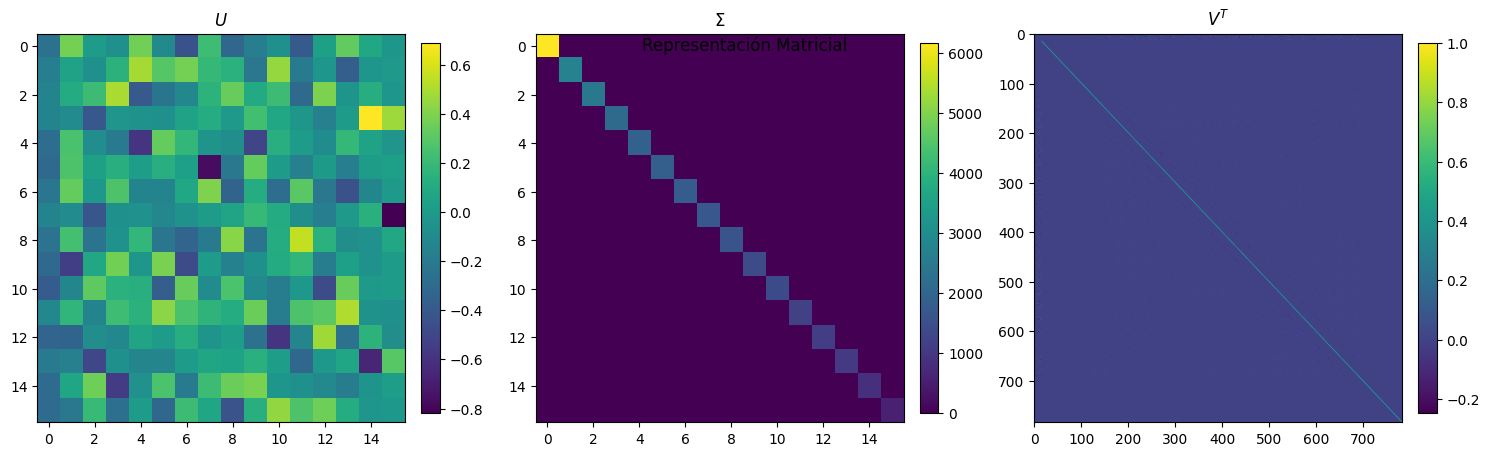

In [46]:



from os import listdir, path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Ruta de la carpeta donde están las imágenes
ruta_carpeta = '/Users/juanjo/Desktop/GitHub/TPsMETODOS/TP3/TP 03 dataset imagenes'

imagenes_matrices = []  # Lista de matrices de las imágenes

lista_imagenes = []

for archivo in listdir(ruta_carpeta):
        if archivo.endswith('.jpeg'):  # Filtrar imágenes
            ruta_imagen = path.join(ruta_carpeta, archivo)
            imagen = Image.open(ruta_imagen)  # Convertir a escala de grises
            matriz_imagen = np.array(imagen)
            lista_imagenes.append(matriz_imagen)
            imagenes_matrices.append(matriz_imagen.flatten())  # Convertir en vector
        
A = np.vstack(imagenes_matrices)

print(A.shape, lista_imagenes[0].shape)

U, S, VT = np.linalg.svd(A, full_matrices=True)

# REPRESNTACION MATRICIAL


# Representación matricial mejorada
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Mostrar U
im1 = ax1.imshow(U, cmap='viridis', aspect='auto')
ax1.set_title('$U$')
plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

# Mostrar la matriz diagonal de S en una escala logarítmica para mejor visualización
im2 = ax2.imshow(np.diag(S), cmap='viridis', aspect='auto')  # log1p para evitar log(0)
ax2.set_title(r'$\Sigma$')
plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

# Mostrar V^T
im3 = ax3.imshow(VT, cmap='viridis', aspect='auto')
ax3.set_title('$V^T$')
plt.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)

plt.suptitle('Representación Matricial', y=0.85)
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()



/var/folders/n6/kvnwmh3x5j32g2gnn_htyq1w0000gp/T/ipykernel_1337/3792604805.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajusta el área de la cuadrícula para dejar espacio para la barra de color


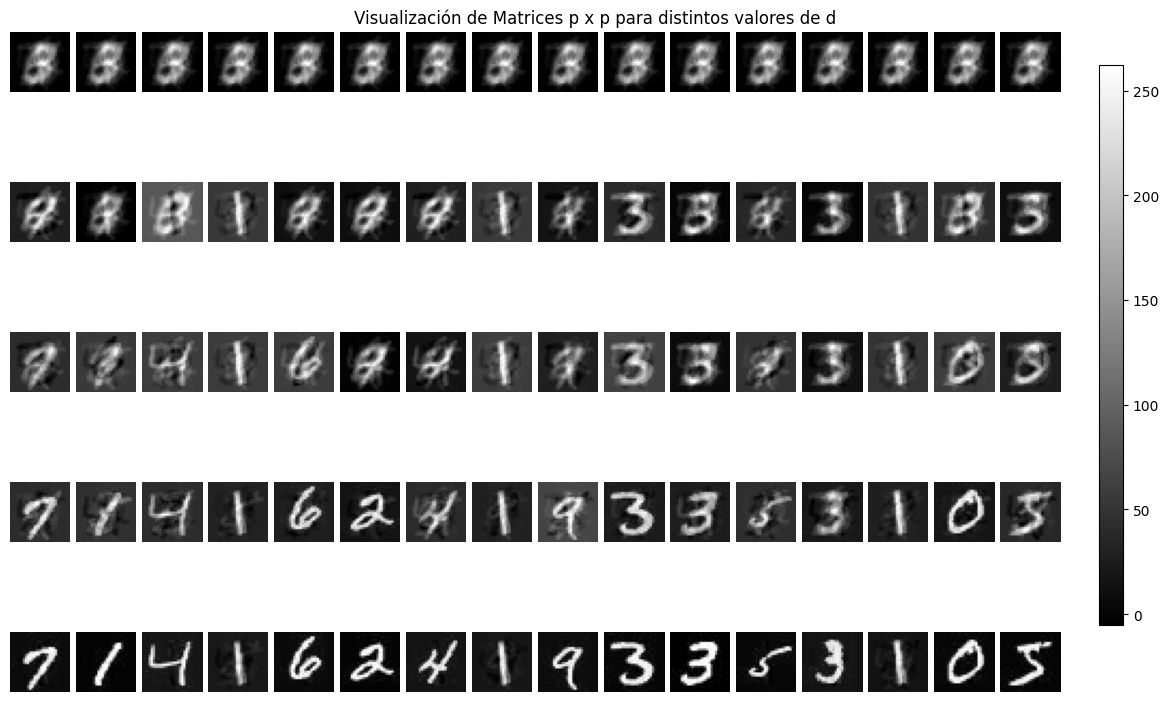

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir, path
from PIL import Image

# Ruta de la carpeta donde están las imágenes
ruta_carpeta = '/Users/juanjo/Desktop/GitHub/TPsMETODOS/TP3/TP 03 dataset imagenes'

imagenes_matrices = []  # Lista de matrices de las imágenes
lista_imagenes = []

for archivo in listdir(ruta_carpeta):
    if archivo.endswith('.jpeg'):  # Filtrar imágenes
        ruta_imagen = path.join(ruta_carpeta, archivo)
        imagen = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
        matriz_imagen = np.array(imagen)
        lista_imagenes.append(matriz_imagen)
        imagenes_matrices.append(matriz_imagen.flatten())  # Convertir en vector
        
# Convertir la lista de imágenes en una matriz
A = np.vstack(imagenes_matrices)

# Descomposición SVD
U, S, VT = np.linalg.svd(A, full_matrices=False)

# Valores de d que queremos probar (d = número de componentes principales)
d_values = [1, 3, 5, 10, 14]  # Puedes ajustar estos valores

# Crear la figura para mostrar las matrices reconstruidas
fig, axes = plt.subplots(len(d_values), len(lista_imagenes), figsize=(12, 8))

for row, d in enumerate(d_values):
    # Reducción y reconstrucción para el valor actual de d
    Ud = U[:, :d]
    Sd = np.diag(S[:d])
    Vtd = VT[:d, :]
    
    A_d = Ud @ Sd @ Vtd  # Matriz reconstruida

    # Mostrar cada imagen reconstruida como matriz en la fila correspondiente
    for i, img_vec in enumerate(A_d):
        img_reconstruida = img_vec.reshape(lista_imagenes[i].shape)
        im = axes[row, i].imshow(img_reconstruida, cmap='gray')
        axes[row, i].axis('off')

    # Añadir un título con el valor de d para cada fila
    axes[row, 0].set_ylabel(f"d = {d}", size=12, rotation=0, labelpad=30, ha='center', va='center')

# Crear un eje separado para la barra de color a la derecha
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax)

# Ajustes de la figura
fig.suptitle("Visualización de Matrices p x p para distintos valores de d", y=0.92)
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajusta el área de la cuadrícula para dejar espacio para la barra de color
plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Ajuste del espacio entre subgráficos
plt.show()


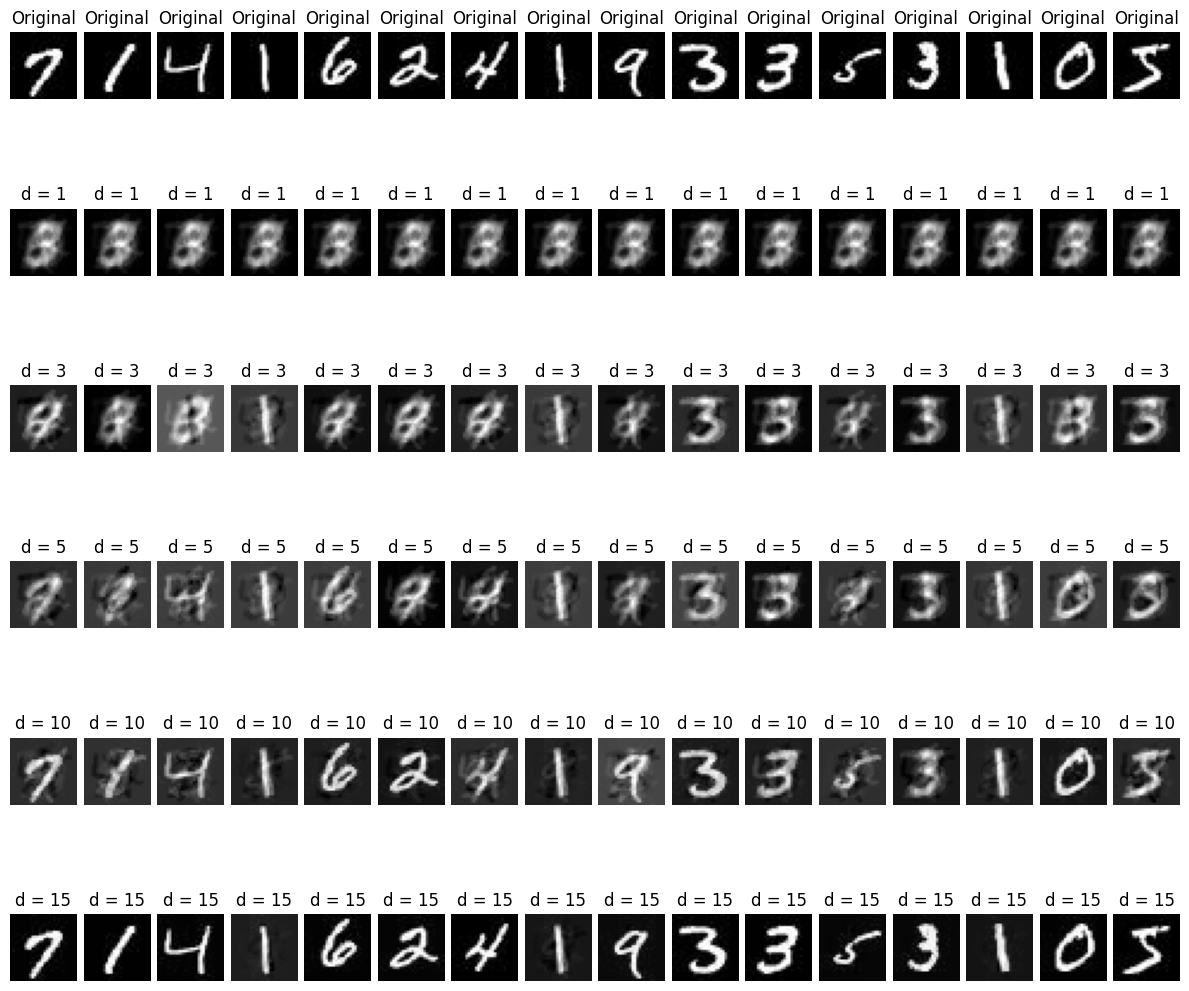

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir, path
from PIL import Image

# Ruta de la carpeta donde están las imágenes
ruta_carpeta = '/Users/juanjo/Desktop/GitHub/TPsMETODOS/TP3/TP 03 dataset imagenes'

imagenes_matrices = []  # Lista de matrices de las imágenes
lista_imagenes = []

for archivo in listdir(ruta_carpeta):
    if archivo.endswith('.jpeg'):  # Filtrar imágenes
        ruta_imagen = path.join(ruta_carpeta, archivo)
        imagen = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
        matriz_imagen = np.array(imagen)
        lista_imagenes.append(matriz_imagen)
        imagenes_matrices.append(matriz_imagen.flatten())  # Convertir en vector
        
# Convertir la lista de imágenes en una matriz
A = np.vstack(imagenes_matrices)

# Descomposición SVD
U, S, VT = np.linalg.svd(A, full_matrices=False)

# Valores de d que queremos probar (d = número de componentes principales)
d_values = [1, 3, 5, 10, 15]  # Puedes ajustar estos valores

# Graficar las imágenes originales y las reconstruidas
fig, axes = plt.subplots(len(d_values) + 1, len(lista_imagenes), figsize=(12, 10))

# Primera fila: Imágenes originales
for i, img in enumerate(lista_imagenes):
    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')

# Filas siguientes: Imágenes reconstruidas con diferentes valores de d
for row, d in enumerate(d_values, start=1):
    # Reducción y reconstrucción para el valor actual de d
    Ud = U[:, :d]
    Sd = np.diag(S[:d])
    Vtd = VT[:d, :]
    
    A_d = Ud @ Sd @ Vtd  # Matriz reconstruida

    # Mostrar cada imagen reconstruida en la fila correspondiente
    for i, img_vec in enumerate(A_d):
        img_reconstruida = img_vec.reshape(lista_imagenes[i].shape)
        axes[row, i].imshow(img_reconstruida, cmap='gray')
        axes[row, i].set_title(f"d = {d}")
        axes[row, i].axis('off')

# plt.suptitle("Imágenes Originales y Reconstruidas para Distintos Valores de d", y=0.92)
plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=1) 
plt.show()


(16, 1) (1, 1) (1, 784)


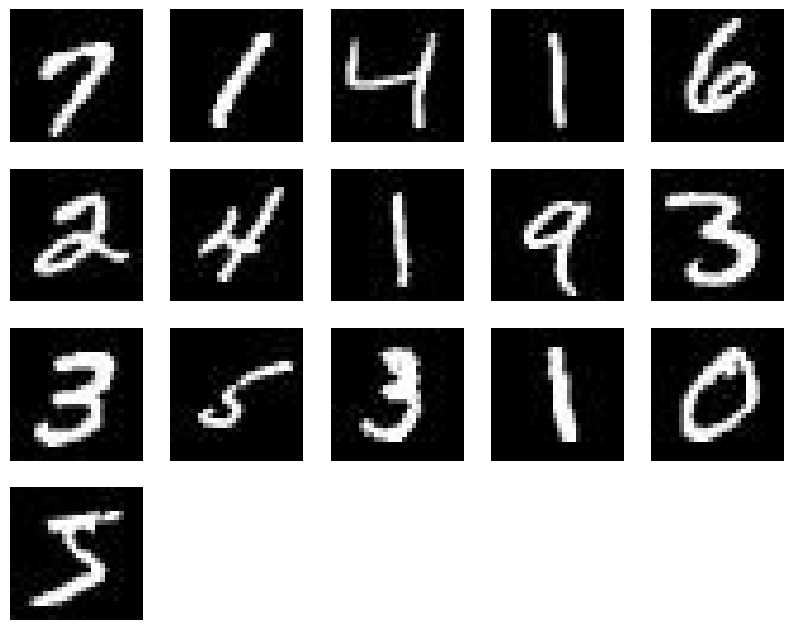

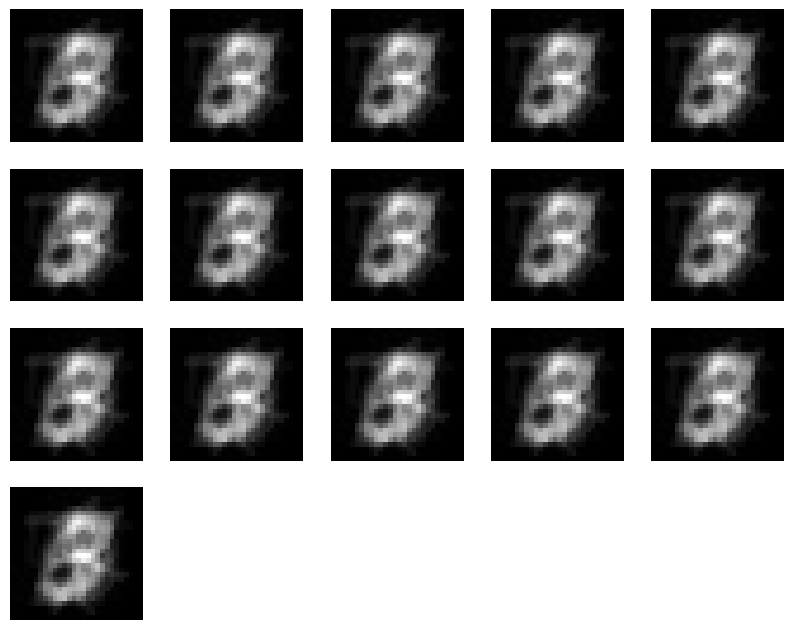

In [12]:

from os import listdir, path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Ruta de la carpeta donde están las imágenes
ruta_carpeta = '/Users/juanjo/Desktop/GitHub/TPsMETODOS/TP3/TP 03 dataset imagenes'

imagenes_matrices = []  # Lista de matrices de las imágenes

lista_imagenes = []

for archivo in listdir(ruta_carpeta):
        if archivo.endswith('.jpeg'):  # Filtrar imágenes
            ruta_imagen = path.join(ruta_carpeta, archivo)
            imagen = Image.open(ruta_imagen)  # Convertir a escala de grises
            matriz_imagen = np.array(imagen)
            lista_imagenes.append(matriz_imagen)
            imagenes_matrices.append(matriz_imagen.flatten()) 

A = np.array(imagenes_matrices)

U, S, V = np.linalg.svd(A, full_matrices=False)
S = np.diag(S)

d_values = [1]  

# Paso 3: Crear una figura para visualizar las reconstrucciones
# plt.figure(figsize=(10, 2 * len(d_values)))



for i, d in enumerate(d_values, 1):
    # Tomar los primeros d valores de U, S y Vt
    Ud = U[:, :d]
    Sd = S[:d, :d]
    Vtd = V[:d, :]
    
    print(Ud.shape, Sd.shape, Vtd.shape)

    # Reconstruir la imagen usando solo d componentes
    A_d = Ud @ Sd @ Vtd


imagenes_reconstruidas = []



for i in range(len(lista_imagenes)):
    imagen_reconstruida = A_d[i].reshape(lista_imagenes[i].shape)
    imagenes_reconstruidas.append(imagen_reconstruida)

# Paso 4: Mostrar las imágenes originales

plt.figure(figsize=(10, 10))
for i, imagen in enumerate(lista_imagenes, 1):
    plt.subplot(5, 5, i)
    plt.imshow(imagen, cmap='gray')
    plt.axis('off')


# Mostrar las imágenes reconstruidas

plt.figure(figsize=(10, 10))
for i, imagen in enumerate(imagenes_reconstruidas, 1):
    plt.subplot(5, 5, i)
    plt.imshow(imagen, cmap='gray')
    plt.axis('off')

plt.show()


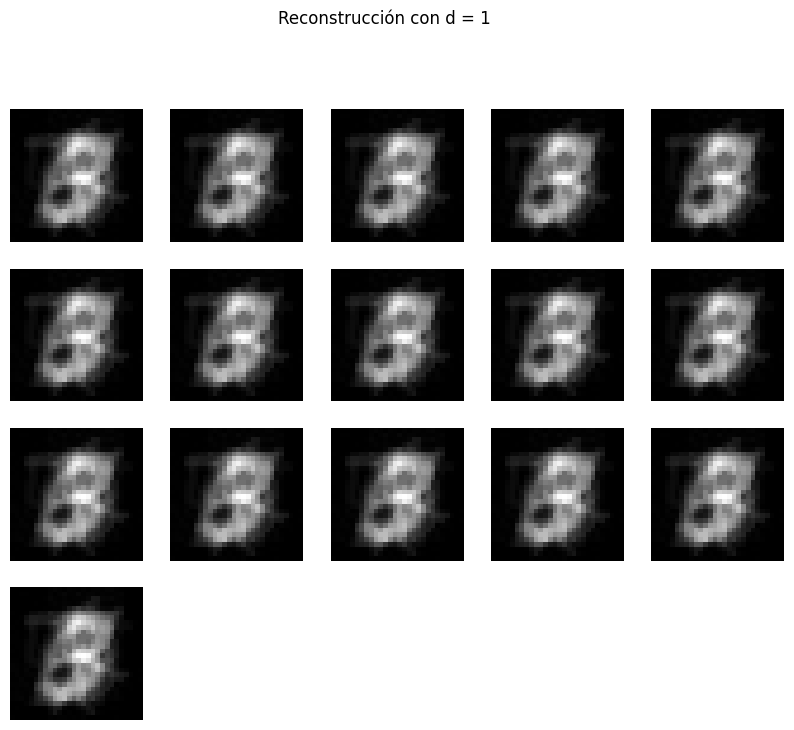

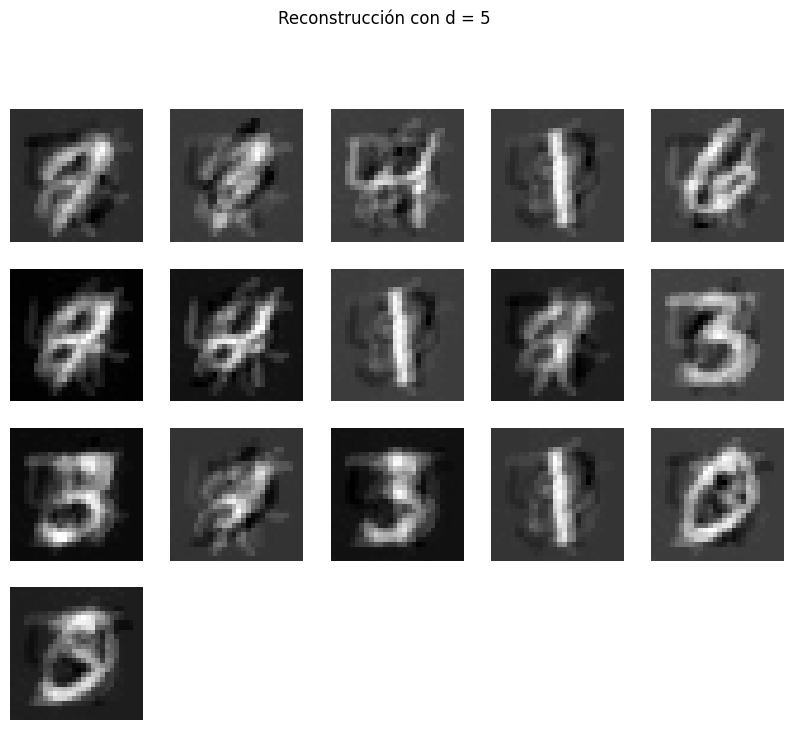

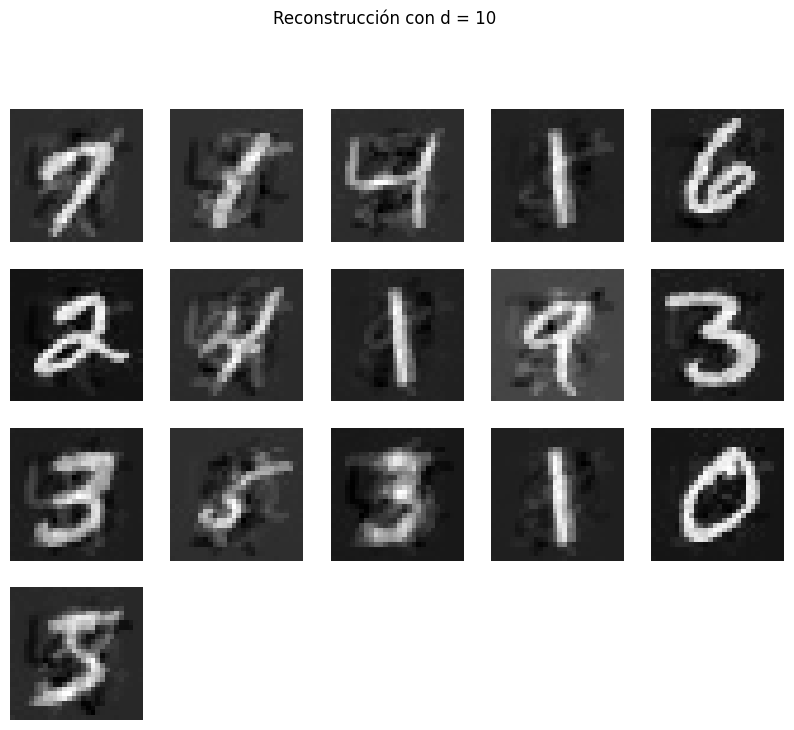

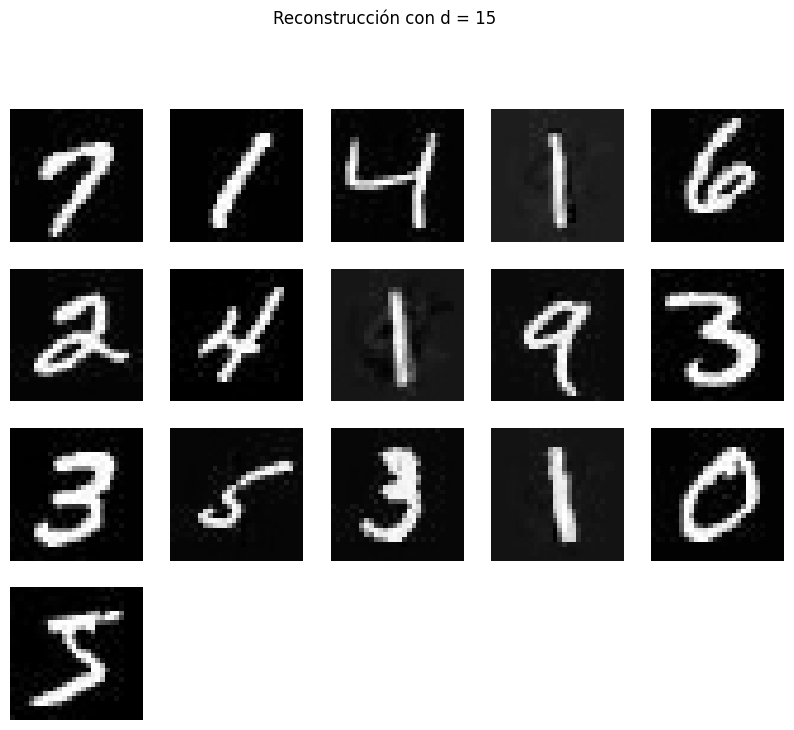

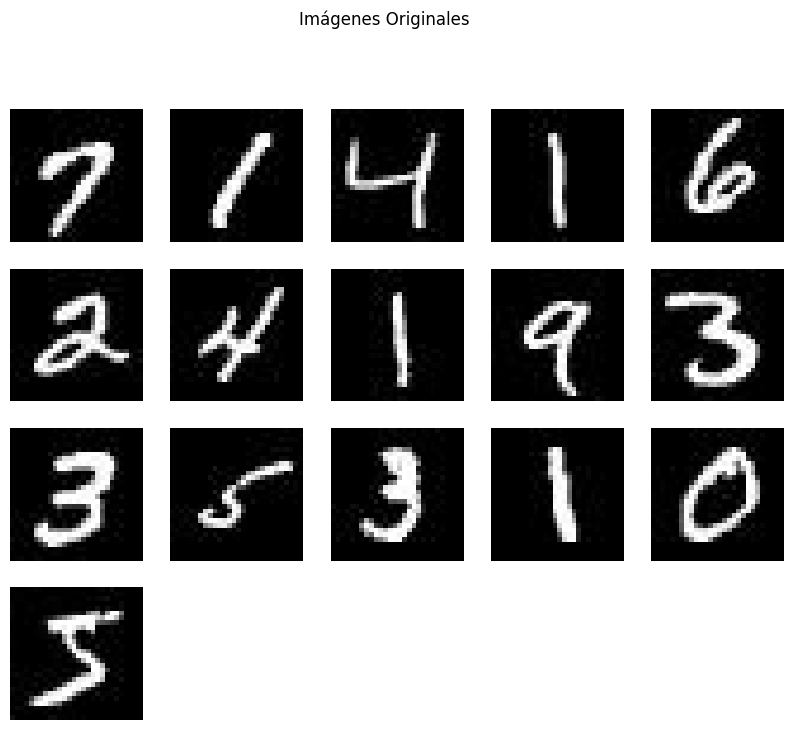

In [17]:

from os import listdir, path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Ruta de la carpeta donde están las imágenes
ruta_carpeta = '/Users/juanjo/Desktop/GitHub/TPsMETODOS/TP3/TP 03 dataset imagenes'

imagenes_matrices = []  # Lista de matrices de las imágenes

lista_imagenes = []

for archivo in listdir(ruta_carpeta):
        if archivo.endswith('.jpeg'):  # Filtrar imágenes
            ruta_imagen = path.join(ruta_carpeta, archivo)
            imagen = Image.open(ruta_imagen)  # Convertir a escala de grises
            matriz_imagen = np.array(imagen)
            lista_imagenes.append(matriz_imagen)
            imagenes_matrices.append(matriz_imagen.flatten()) 

A = np.array(imagenes_matrices)

U, S, V = np.linalg.svd(A, full_matrices=False)
S = np.diag(S)

d_values = [1,5,10,15]  

# Paso 3: Crear una figura para visualizar las reconstrucciones
# plt.figure(figsize=(10, 2 * len(d_values)))

imagenes_reconstruidas_por_d = {}

# Reconstruir A_d para cada valor de d y almacenarlo en un diccionario
for d in d_values:
    Ud = U[:, :d]
    Sd = S[:d, :d]
    Vtd = V[:d, :]
    
    # Reconstrucción para el valor actual de d
    A_d = Ud @ Sd @ Vtd
    imagenes_reconstruidas = [A_d[i].reshape(lista_imagenes[i].shape) for i in range(len(lista_imagenes))]
    
    # Guardar la reconstrucción para el valor actual de d
    imagenes_reconstruidas_por_d[d] = imagenes_reconstruidas

# Graficar las imágenes reconstruidas para cada valor de d
for d, imagenes_reconstruidas in imagenes_reconstruidas_por_d.items():
    plt.figure(figsize=(10, 10))
    plt.suptitle(f"Reconstrucción con d = {d}")
    for i, imagen in enumerate(imagenes_reconstruidas, 1):
        plt.subplot(5, 5, i)
        plt.imshow(imagen, cmap='gray')
        plt.axis('off')
    plt.show()

# Paso 4: Mostrar las imágenes originales

plt.figure(figsize=(10, 10))
for i, imagen in enumerate(lista_imagenes, 1):
    plt.subplot(5, 5, i)
    plt.imshow(imagen, cmap='gray')
    plt.axis('off')
    plt.suptitle('Imágenes Originales')


# Mostrar las imágenes reconstruidas

# plt.figure(figsize=(10, 10))
# for i, imagen in enumerate(imagenes_reconstruidas, 1):
#     plt.subplot(5, 5, i)
#     plt.imshow(imagen, cmap='gray')
#     plt.axis('off')

plt.show()


El valor mínimo de d que asegura un error relativo promedio ≤ 10% es: d = 14


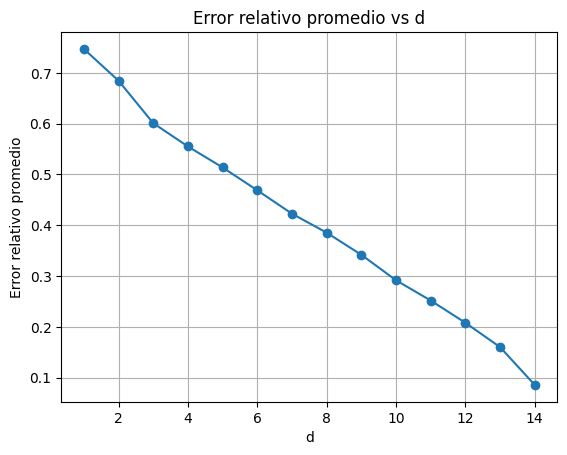

In [19]:

from os import listdir, path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Ruta de la carpeta donde están las imágenes
ruta_carpeta = '/Users/juanjo/Desktop/GitHub/TPsMETODOS/TP3/TP 03 dataset imagenes'

imagenes_matrices = []  # Lista de matrices de las imágenes

lista_imagenes = []

for archivo in listdir(ruta_carpeta):
        if archivo.endswith('.jpeg'):  # Filtrar imágenes
            ruta_imagen = path.join(ruta_carpeta, archivo)
            imagen = Image.open(ruta_imagen)  # Convertir a escala de grises
            matriz_imagen = np.array(imagen)
            lista_imagenes.append(matriz_imagen)
            imagenes_matrices.append(matriz_imagen.flatten()) 

A = np.array(imagenes_matrices)

U, S, V = np.linalg.svd(A, full_matrices=False)
S = np.diag(S)

imagenes_reconstruidas_por_d = {}

# Reconstruir A_d para cada valor de d y almacenarlo en un diccionario
for d in range(1,17):
    Ud = U[:, :d]
    Sd = S[:d, :d]
    Vtd = V[:d, :]
    
    # Reconstrucción para el valor actual de d
    A_d = Ud @ Sd @ Vtd
    imagenes_reconstruidas = [A_d[i].reshape(lista_imagenes[i].shape) for i in range(len(lista_imagenes))]
    
    # Guardar la reconstrucción para el valor actual de d
    imagenes_reconstruidas_por_d[d] = imagenes_reconstruidas

# Calcula la norma de Frobenius para cada imagen original (esto será el "valor total" de cada imagen)
errores_originales = [np.linalg.norm(imagen, 'fro') for imagen in lista_imagenes]

# Definir el límite de error relativo promedio permitido (10%)
limite_error_promedio = 0.10

# Encontrar el valor mínimo de d que cumpla con el límite de error promedio
d_optimo = None

errores_relativos_promedio = {}

for d in range(1, min(A.shape) + 1):  # d varía desde 1 hasta el rango máximo permitido
    Ud = U[:, :d]
    Sd = S[:d, :d]
    Vtd = V[:d, :]
    
    # Reconstrucción para el valor actual de d
    A_d = Ud @ Sd @ Vtd
    
    # Calcular el error relativo promedio para este valor de d
    errores_relativos = []
    for i in range(len(lista_imagenes)):
        # Reshape para obtener la imagen reconstruida
        imagen_reconstruida = A_d[i].reshape(lista_imagenes[i].shape)
        
        # Calcular el error de Frobenius para esta imagen
        error_frobenius = np.linalg.norm(lista_imagenes[i] - imagen_reconstruida, 'fro')
        
        # Calcular el error relativo
        error_relativo = error_frobenius / errores_originales[i]
        errores_relativos.append(error_relativo)
    
    # Calcular el error promedio de Frobenius para este valor de d
    error_promedio = np.mean(errores_relativos)
    errores_relativos_promedio[d] = error_promedio
    
    # Verificar si el error promedio cumple con el límite de 10%
    if error_promedio <= limite_error_promedio:
        d_optimo = d
        break

print(f"El valor mínimo de d que asegura un error relativo promedio ≤ 10% es: d = {d_optimo}")

# graficar el error relativo promedio vs d

plt.plot(list(errores_relativos_promedio.keys()), list(errores_relativos_promedio.values()), marker='o')
plt.xlabel('d')
plt.ylabel('Error relativo promedio')
plt.title('Error relativo promedio vs d')
plt.grid()
plt.show()

